In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\passwords.csv")

In [3]:
data

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isnull().sum()

rank                 0
password             0
category             0
value                0
time_unit            0
offline_crack_sec    0
rank_alt             0
strength             0
font_size            0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [8]:
#top ten records of dataset
data.head(10)

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0
5,6.0,12345,simple-alphanumeric,1.85,minutes,1.110000e-06,6.0,4.0,8.0
6,7.0,dragon,animal,3.72,days,3.210000e-03,7.0,8.0,11.0
7,8.0,baseball,sport,6.91,years,2.170000e+00,8.0,4.0,8.0
8,9.0,football,sport,6.91,years,2.170000e+00,9.0,7.0,11.0
9,10.0,letmein,password-related,3.19,months,8.350000e-02,10.0,8.0,11.0


In [9]:
#last 10 records of dataset
data.tail(10)

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
490,491.0,natasha,name,3.19,months,0.08350,493.0,7.0,11.0
491,492.0,sniper,cool-macho,3.72,days,0.00321,494.0,8.0,11.0
492,493.0,chance,name,3.72,days,0.00321,495.0,7.0,11.0
493,494.0,genesis,nerdy-pop,3.19,months,0.08350,496.0,7.0,11.0
494,495.0,hotrod,cool-macho,3.72,days,0.00321,497.0,7.0,11.0
495,496.0,reddog,cool-macho,3.72,days,0.00321,498.0,6.0,10.0
496,497.0,alexande,name,6.91,years,2.17000,499.0,9.0,12.0
497,498.0,college,nerdy-pop,3.19,months,0.08350,500.0,7.0,11.0
498,499.0,jester,name,3.72,days,0.00321,501.0,7.0,11.0
499,500.0,passw0rd,password-related,92.27,years,29.02000,502.0,28.0,21.0


so here we saw the dataset and we no lets try to understand what each ecords means row and variable means columns reresent

**rank**:popularity in the database 

**password**: actual password text

**category**: category password fall into

**value**:Time to crak by online guessing

**time_unit**:Time unit to match with value

**offline_crack_sec**:Time to crack offline in seconds

**strength**:Strength of password, relative only to passwords in this dataset.
Lower values indicate weaker passwords.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    float64
 7   strength           500 non-null    float64
 8   font_size          500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 39.1+ KB


In [11]:
data['time_unit'].value_counts()

time_unit
days       238
months      87
years       65
minutes     51
hours       43
seconds     11
weeks        5
Name: count, dtype: int64

In [15]:
df = data.groupby('time_unit')['value'].agg(['count','min','max']).reset_index()
df.columns=['time_unit', 'n', 'min', 'max']

In [16]:
df

,time_unit,n,min,max
0,days,238,1.29,3.72
1,hours,43,3.09,17.28
2,minutes,51,1.85,18.52
3,months,87,3.19,3.19
4,seconds,11,11.11,11.11
5,weeks,5,1.84,3.70
6,years,65,2.56,92.27


## Distributions of the categorical variables in the passwords dataset. Plot A shows the distribution of password strengths, Plot B password categories, and Plot C length of time it takes to crack the passwords by online guessing.


Text(0, 0.5, 'Time_unit')

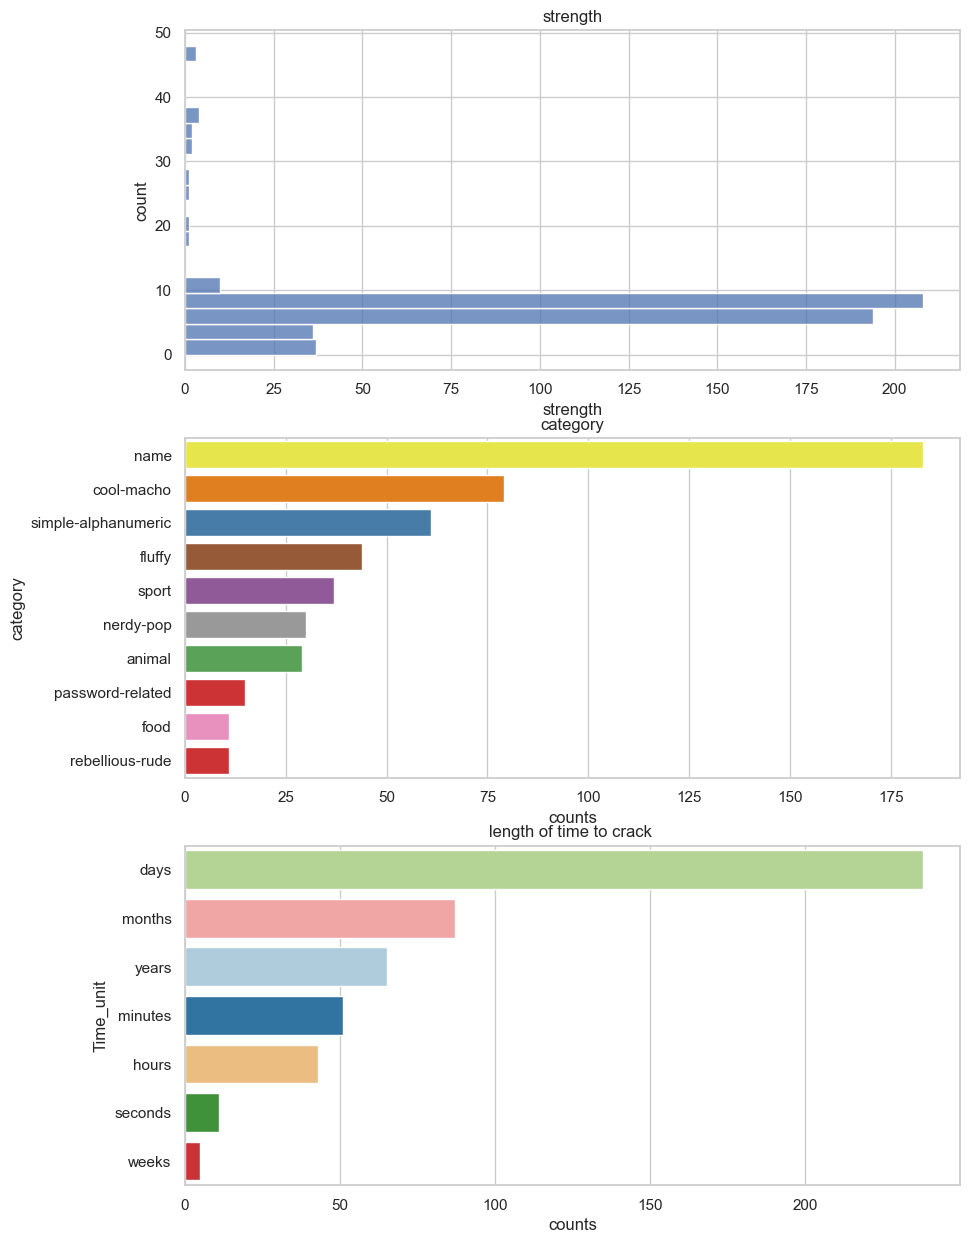

In [40]:
sns.set(style="whitegrid")
fig,axes  = plt.subplots(3,1,figsize=(10,15))
sns.histplot(y=data['strength'],kde=False,bins=20,ax=axes[0])
axes[0].set_title("strength")
axes[0].set_xlabel('strength')
axes[0].set_ylabel('count')

sns.countplot(y=data['category'],order=data['category'].value_counts().index,ax=axes[1],palette='Set1',legend=False,hue=data['category'])
axes[1].set_title("category")
axes[1].set_xlabel("counts")
axes[1].set_ylabel("category")


sns.countplot(y=data['time_unit'],order=data['time_unit'].value_counts().index,ax=axes[2],palette='Paired',legend=False,hue=data['time_unit'])
axes[2].set_title("length of time to crack ")
axes[2].set_xlabel("counts")
axes[2].set_ylabel("Time_unit")


### Passwords that take the longest amount of time to crack by online guessing

In [53]:
top_years_data = data[data['time_unit'] == 'years'].sort_values(by='value', ascending=False).head(4)
top_years_data.sort_values(by='rank')

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
25,26.0,trustno1,simple-alphanumeric,92.27,years,29.02,26.0,25.0,20.0
335,336.0,rush2112,nerdy-pop,92.27,years,29.02,337.0,48.0,28.0
405,406.0,jordan23,sport,92.27,years,29.27,407.0,34.0,23.0
499,500.0,passw0rd,password-related,92.27,years,29.02,502.0,28.0,21.0


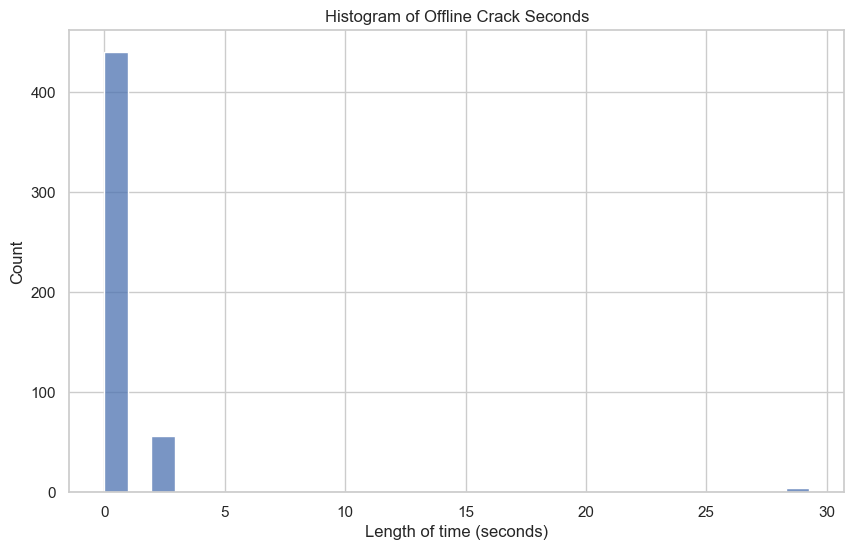

In [57]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data=data, x='offline_crack_sec', bins=30)  # Adjust bins as needed
plt.title('Histogram of Offline Crack Seconds')
plt.xlabel('Length of time (seconds)')
plt.ylabel('Count')
plt.show()

In [59]:
data['category'].value_counts()

category
name                   183
cool-macho              79
simple-alphanumeric     61
fluffy                  44
sport                   37
nerdy-pop               30
animal                  29
password-related        15
food                    11
rebellious-rude         11
Name: count, dtype: int64

## : Rank vs. strength of 500 most common passwords by category

C:\Users\dell\AppData\Local\Temp\ipykernel_24044\2822937793.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_passwords = data.groupby('category').apply(lambda x: x.nsmallest(10, 'rank')).reset_index(drop=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_24044\2822937793.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(categories))  # Use a colormap with enough colors for each category


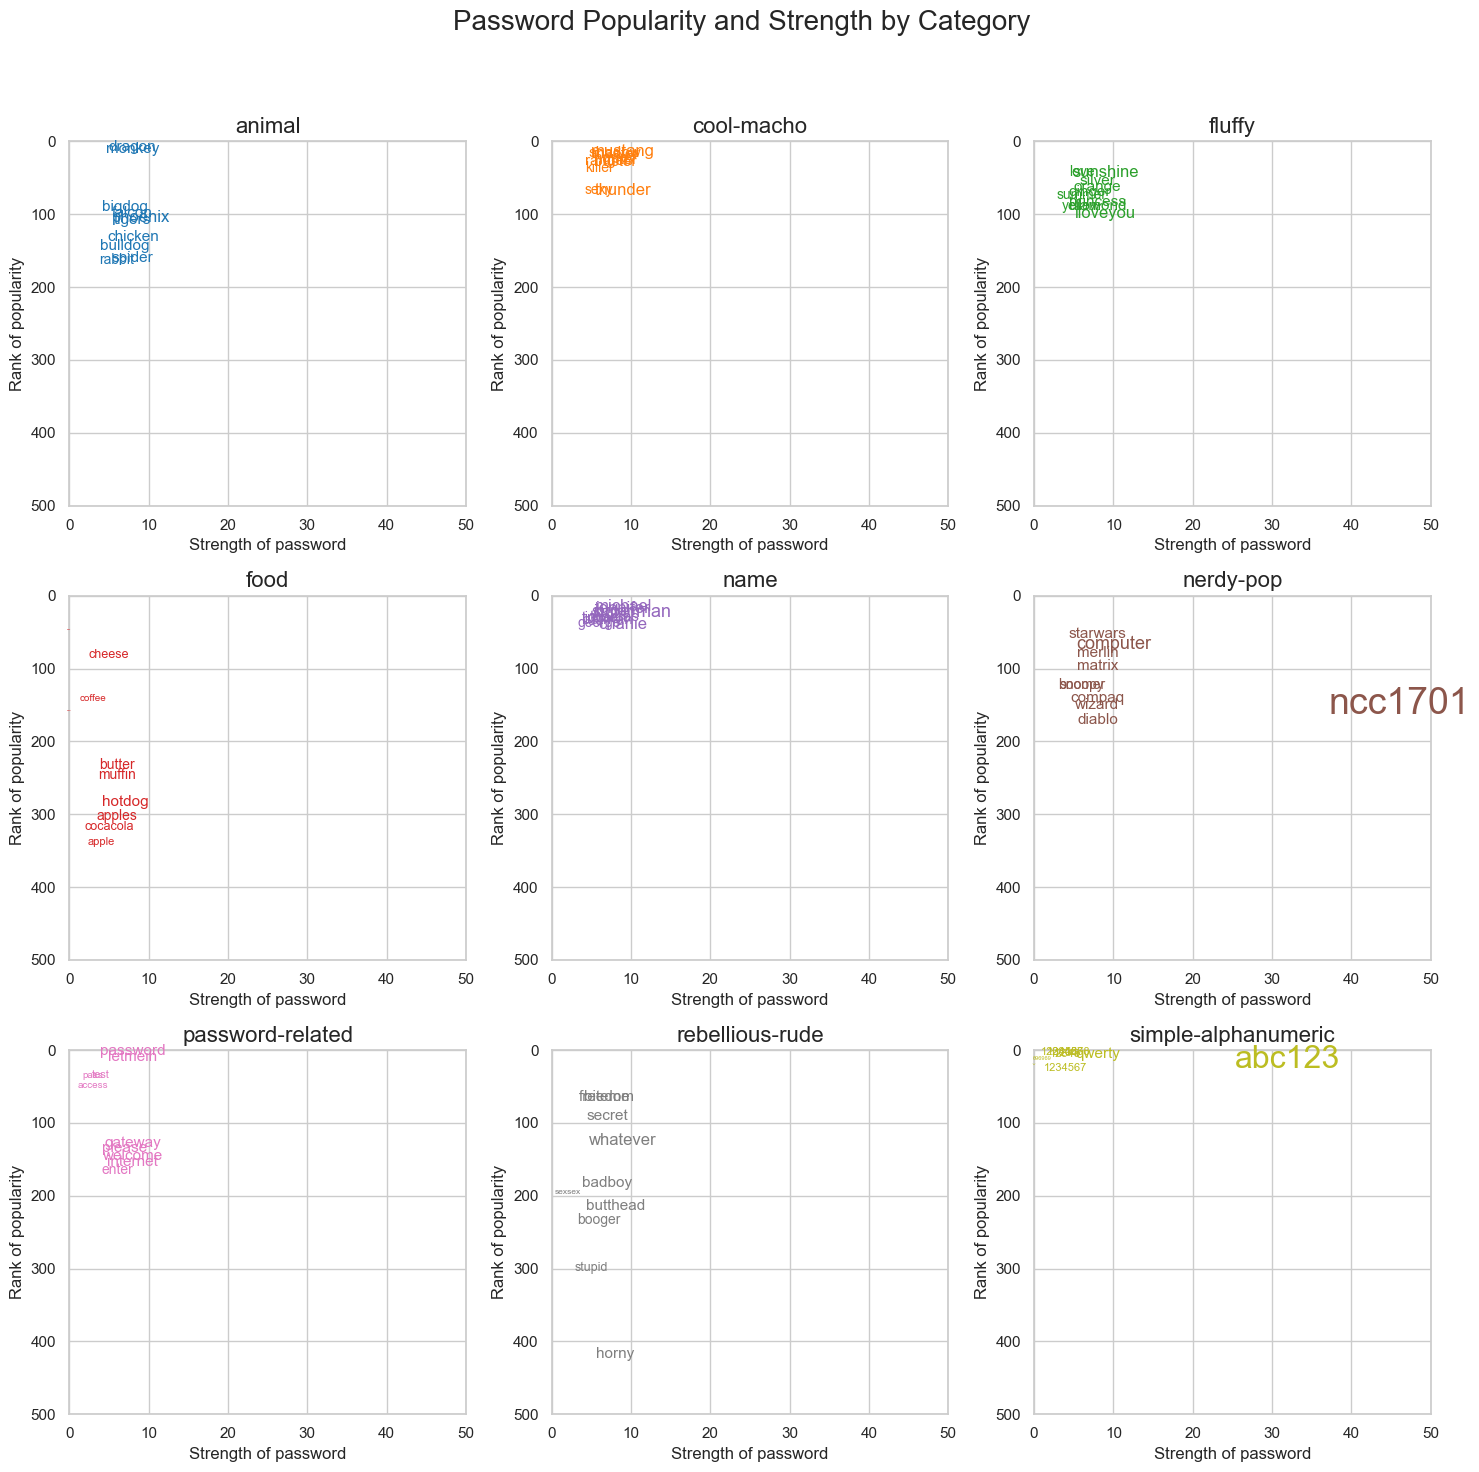

In [73]:

top_passwords = data.groupby('category').apply(lambda x: x.nsmallest(10, 'rank')).reset_index(drop=True)


fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Password Popularity and Strength by Category', fontsize=20)


categories = top_passwords['category'].unique()
colors = plt.cm.get_cmap('tab10', len(categories))  


for i, ax in enumerate(axs.flatten()):
    if i < len(categories):
        category = categories[i]
        subset = top_passwords[top_passwords['category'] == category]
        for _, row in subset.iterrows():
            ax.text(row['strength'], row['rank'], row['password'], fontsize=row['font_size'], ha='center', va='center', color=colors(i))
        ax.set_title(category, fontsize=16)
        ax.set_xlim(0, 50)
        ax.set_ylim(0, 500)
        ax.set_xlabel('Strength of password', fontsize=12)
        ax.set_ylabel('Rank of popularity', fontsize=12)
        ax.invert_yaxis()  
    else:
        fig.delaxes(ax)  

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()